In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

In [23]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/leukemia_dataset.csv")
df.head(5)

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


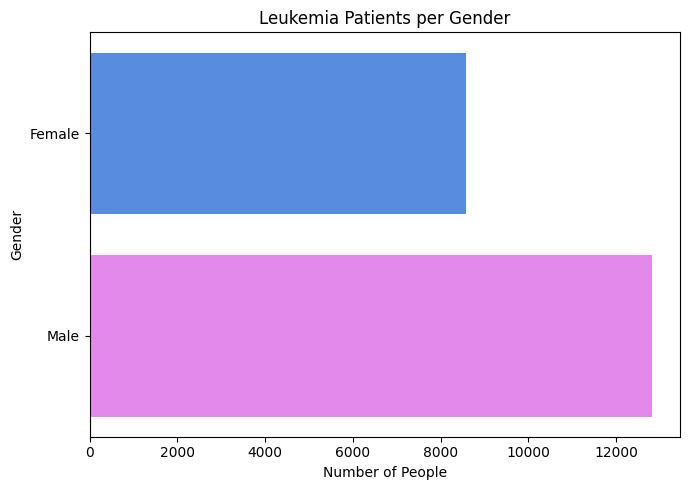

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/leukemia_dataset.csv")

# Filtra solo pazienti con leucemia
df_positive = df[df["Leukemia_Status"].str.strip().str.capitalize() == "Positive"]

plt.figure(figsize=(7,5))

# Palette personalizzata per Gender
palette = {
    "Female": (66/255, 135/255, 245/255),  # blu
    "Male": (242/255, 121/255, 252/255)    # rosa/lilla
}

sns.countplot(
    data=df_positive,
    y="Gender",             
    hue="Gender",  # ora hue = Gender per avere i colori distinti
    palette=palette,
    dodge=False    # le barre si sovrappongono perché hue = y
)

plt.title("Leukemia Patients per Gender")
plt.xlabel("Number of People")
plt.ylabel("Gender")

plt.tight_layout()
plt.show()


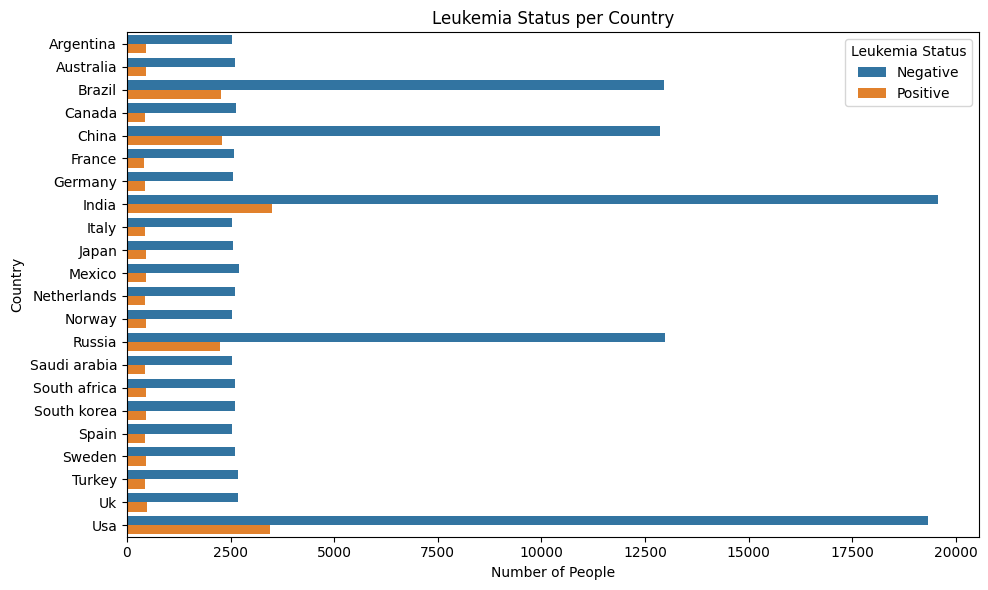

In [25]:
# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df["Leukemia_Status"] = df["Leukemia_Status"].str.strip().str.capitalize()
df["Country"] = df["Country"].str.strip().str.capitalize()

# Calcolo conteggi assoluti per Country + Leukemia_Status
count_df = (
    df.groupby(["Country", "Leukemia_Status"])
      .size()
      .reset_index(name="Count")
)

plt.figure(figsize=(10,6))

# Barplot orizzontale con conteggi assoluti
sns.barplot(
    data=count_df,
    y="Country",
    x="Count",
    hue="Leukemia_Status",
    dodge=True
)

plt.xlabel("Number of People")
plt.ylabel("Country")
plt.title("Leukemia Status per Country")
plt.legend(title="Leukemia Status", loc='upper right')
plt.tight_layout()
plt.show()



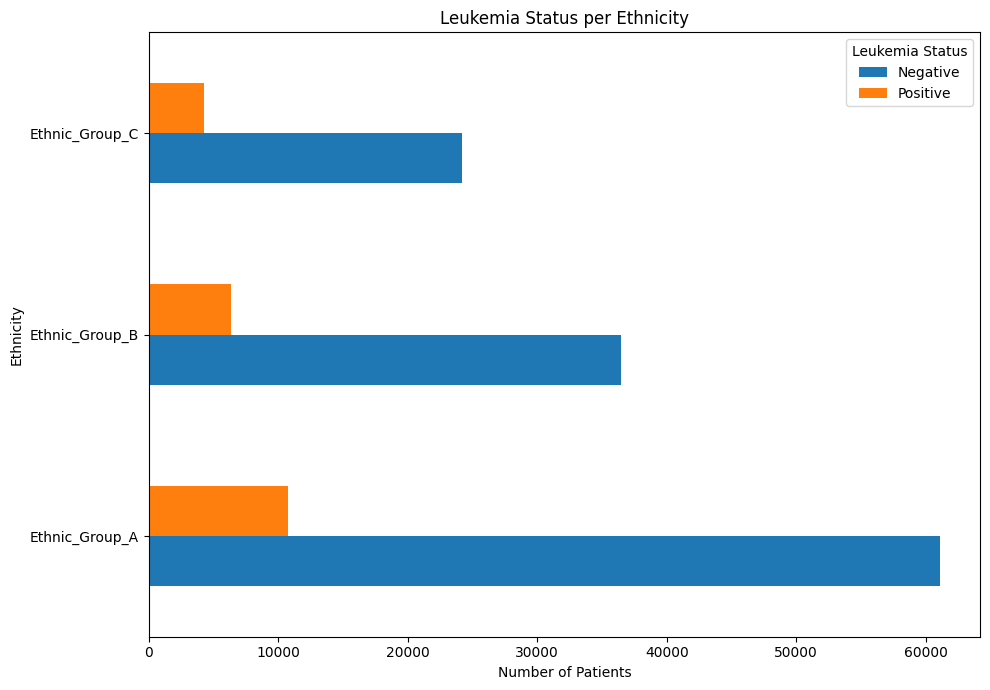

In [26]:
df = pd.read_csv("../data/leukemia_dataset.csv")
cross = pd.crosstab(df["Ethnicity"], df["Leukemia_Status"])

# Bar plot orizzontale
cross.plot(kind="barh", stacked=False, figsize=(10,7))

plt.xlabel("Number of Patients")
plt.ylabel("Ethnicity")
plt.title("Leukemia Status per Ethnicity")
plt.legend(title="Leukemia Status")
plt.tight_layout()
plt.show()


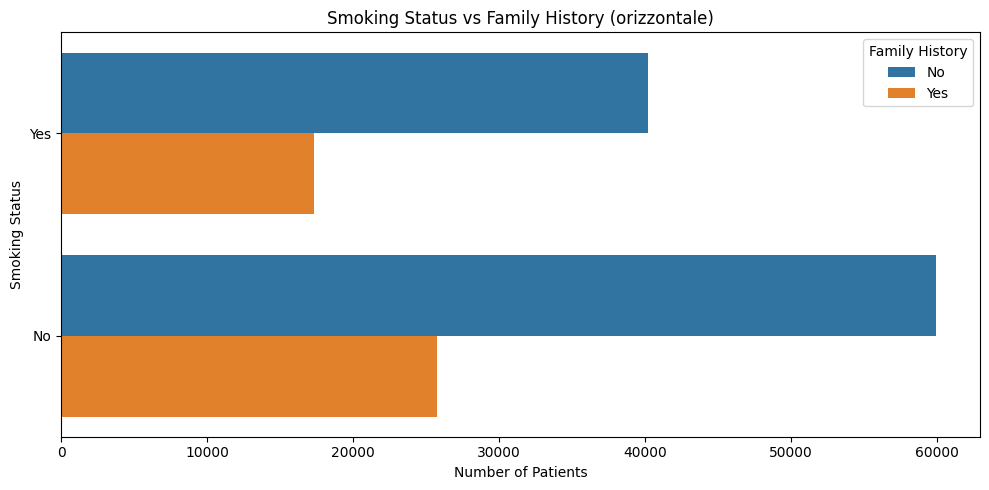

In [27]:
df = pd.read_csv("../data/leukemia_dataset.csv")
plt.figure(figsize=(10,5))

sns.countplot(
    data=df,
    y="Smoking_Status",     
    hue="Family_History",
    orient="h"
)

plt.title("Smoking Status vs Family History (orizzontale)")
plt.xlabel("Number of Patients")
plt.ylabel("Smoking Status")
plt.legend(title="Family History")
plt.tight_layout()
plt.show()



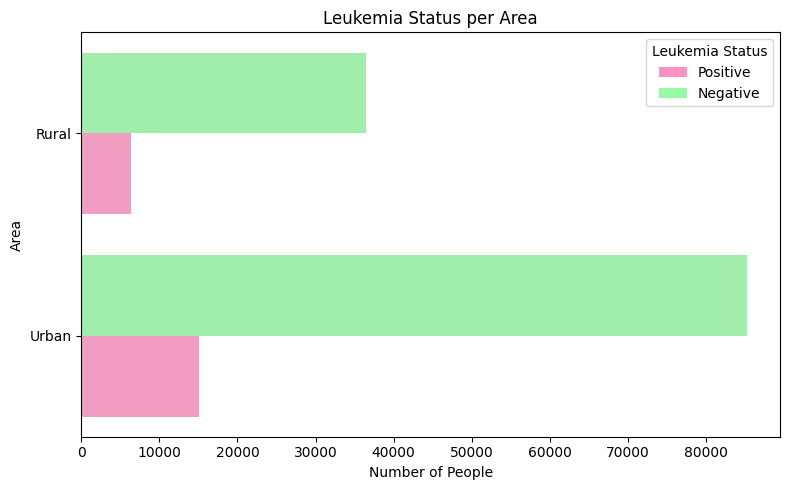

In [43]:


# Leggi il datase
df = pd.read_csv("../data/leukemia_dataset.csv")

# Normalizza i valori
df['Leukemia_Status'] = df['Leukemia_Status'].str.strip().str.capitalize()
df['Urban_Rural'] = df['Urban_Rural'].str.strip().str.capitalize()

plt.figure(figsize=(8,5))

# Palette con alpha
palette = {
    "Positive": (255/255, 0/255, 111/255, 0.6),
    "Negative": (7/255, 247/255, 43/255, 0.6)
}

# Countplot con barre affiancate
ax = sns.countplot(
    data=df,
    y="Urban_Rural",
    hue="Leukemia_Status",
    dodge=True,
    palette=palette
)

# Imposta alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

# Legenda personalizzata
handles = [
    Patch(facecolor=(255/255, 0/255, 111/255, 0.43), label="Positive"),
    Patch(facecolor=(7/255, 247/255, 43/255, 0.43), label="Negative")
]
ax.legend(handles=handles, title="Leukemia Status")

plt.xlabel("Number of People")
plt.ylabel("Area")
plt.title("Leukemia Status per Area")

plt.tight_layout()
plt.show()







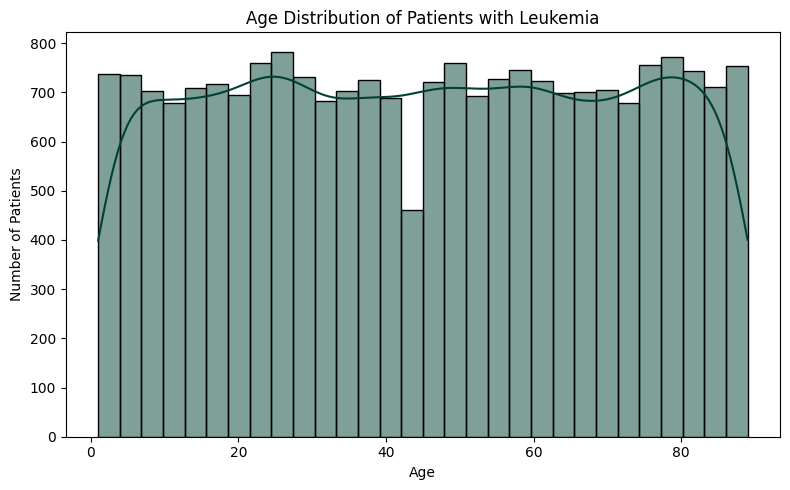

In [44]:
# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Filtra solo i pazienti con leucemia
df_positive = df[df["Leukemia_Status"].str.strip().str.capitalize() == "Positive"]

# Colore
colors = (1/255, 64/255, 52/255)

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df_positive["Age"], bins=30, kde=True, color=colors)
plt.title("Age Distribution of Patients with Leukemia")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()



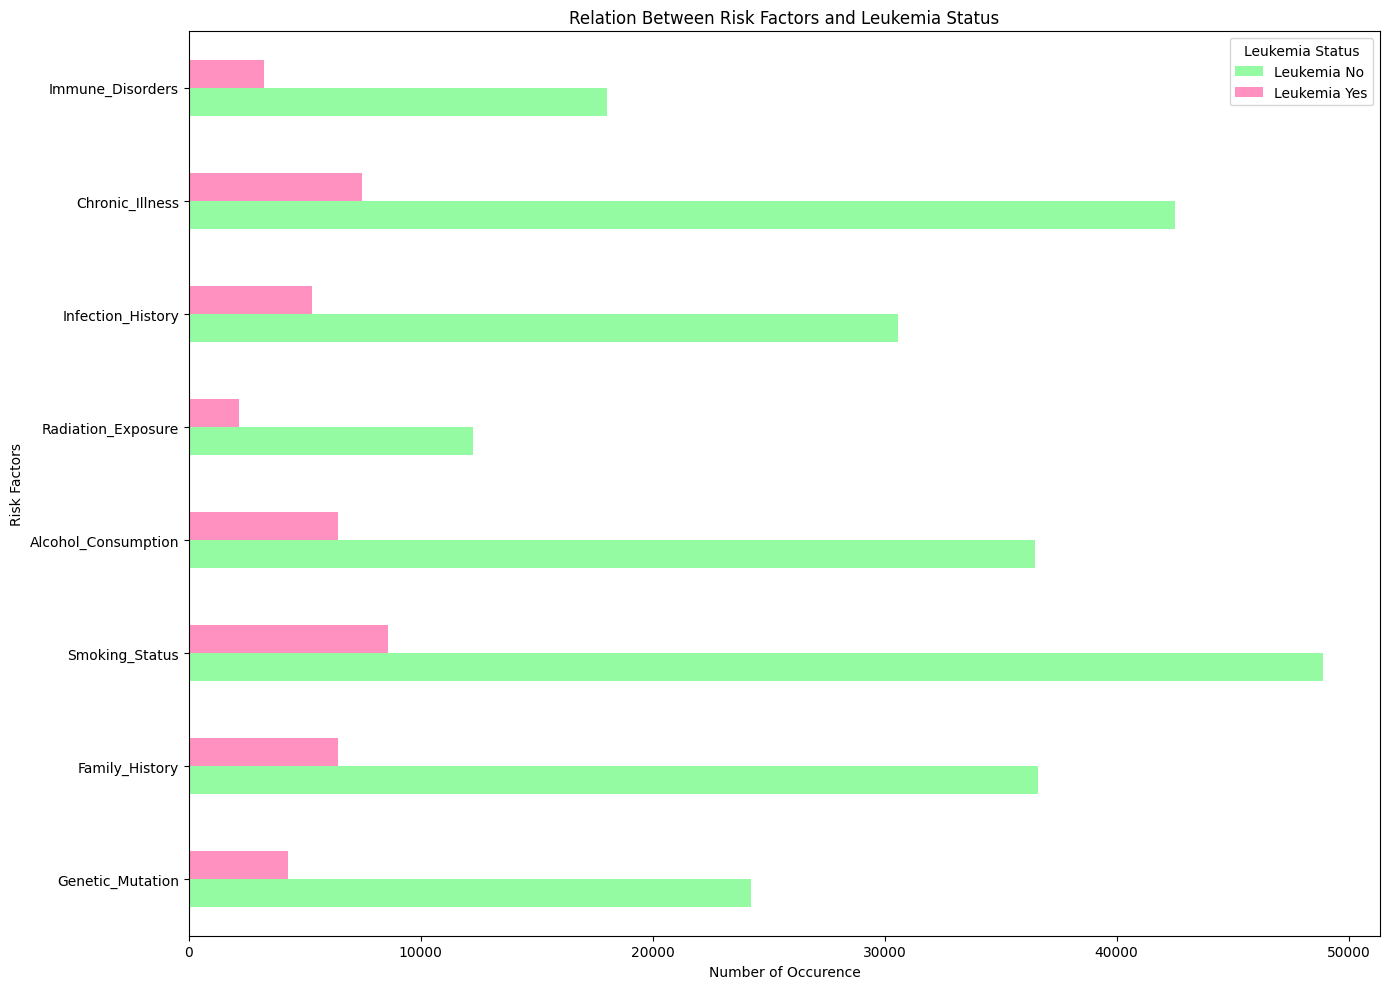

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il dataset
df = pd.read_csv("../data/leukemia_dataset.csv")

# Selezioniamo le colonne di interesse
cols = [
    "Genetic_Mutation", "Family_History", "Smoking_Status", "Alcohol_Consumption",
    "Radiation_Exposure", "Infection_History", "Chronic_Illness", "Immune_Disorders"
]

# Normalizza valori Yes/No
for c in cols:
    df[c] = df[c].astype(str).str.strip().str.capitalize()

df["Leukemia_Status"] = df["Leukemia_Status"].str.strip().str.capitalize()

# Calcolo dei conteggi assoluti di "Yes" per ogni feature e stato
summary_counts = {}
for c in cols:
    temp = df.groupby("Leukemia_Status")[c].value_counts().unstack().fillna(0)
    if "Yes" in temp.columns:
        summary_counts[c] = temp.loc[:, "Yes"]
    elif "Present" in temp.columns:
        summary_counts[c] = temp.loc[:, "Present"]
    else:
        summary_counts[c] = temp.iloc[:, 0]

summary_df = pd.DataFrame(summary_counts).T
summary_df.columns = ["Leukemia No", "Leukemia Yes"]

# Palette colori
colors = [(7/255, 247/255, 43/255), (255/255, 0/255, 111/255)]  # Verde, Rosso

# Plot
ax = summary_df.plot(
    kind="barh",
    figsize=(14, 10),
    color=colors
)

# Imposta alpha
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

plt.xlabel("Number of Occurence")
plt.ylabel("Risk Factors")
plt.title("Relation Between Risk Factors and Leukemia Status")
plt.legend(title="Leukemia Status")
plt.tight_layout()
plt.show()



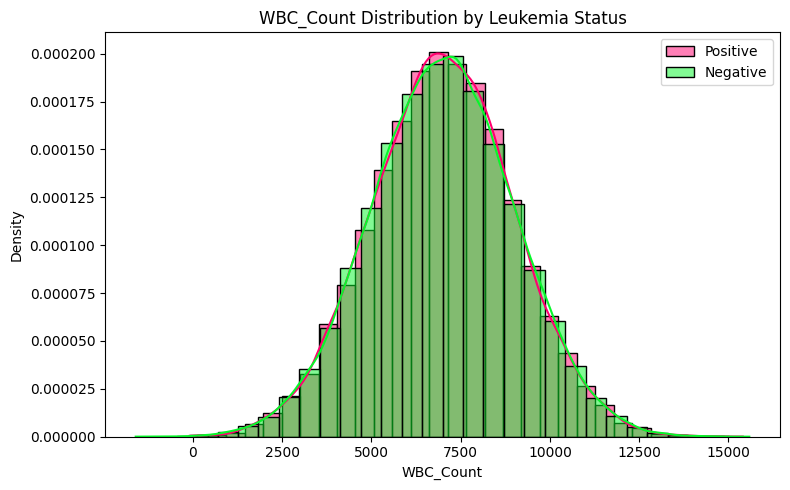

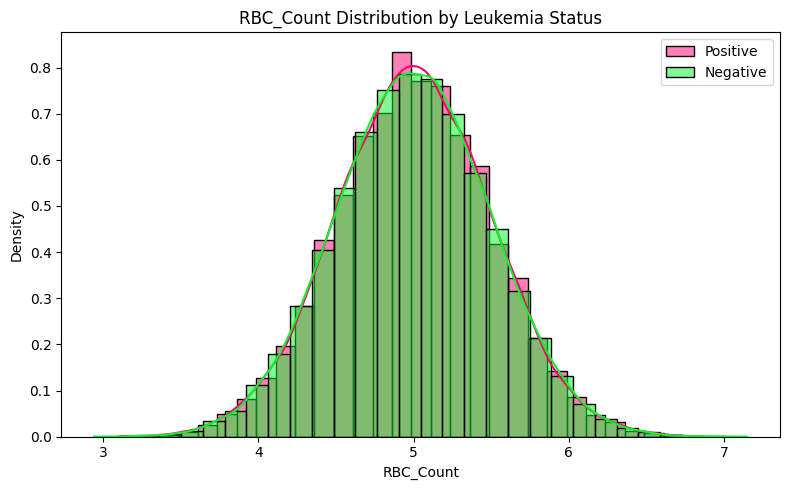

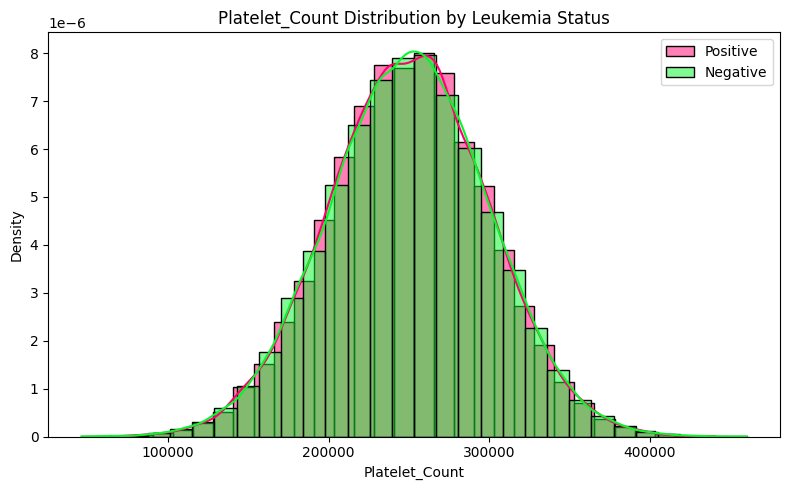

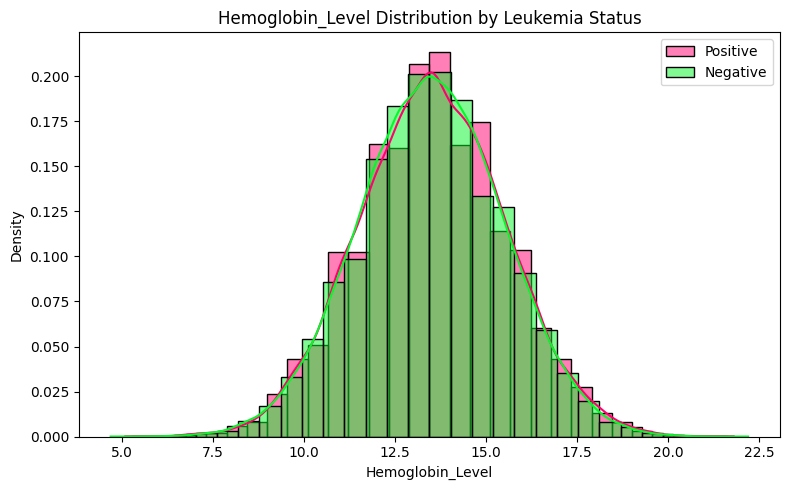

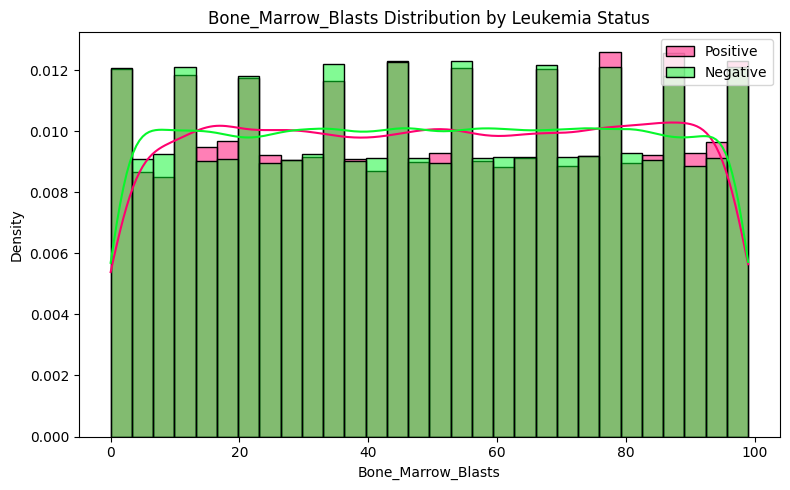

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/leukemia_dataset.csv")

numeric_cols = ["WBC_Count", "RBC_Count", "Platelet_Count", "Hemoglobin_Level", "Bone_Marrow_Blasts"]


for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df[df["Leukemia_Status"]=="Positive"],
        x=col,
        color=(255/255, 0/255, 111/255, 0.6),
        label="Positive",
        bins=30,
        stat="density",
        kde=True
    )
    sns.histplot(
        data=df[df["Leukemia_Status"]=="Negative"],
        x=col,
        color=(7/255, 247/255, 43/255, 0.6),
        label="Negative",
        bins=30,
        stat="density",
        kde=True
    )
    plt.title(f"{col} Distribution by Leukemia Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()





